### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
ydata = np.array([0.0019027,0.0075961,0.0170371,0.0301537,0.0468461,0.0669873])
xdata = np.array([1.7016,1.706,1.710,1.7148,1.7226,1.7302])
yerr = np.array([0.00074082,0.00147601,0.00219996,0.00290717,0.00359226,0.00425000])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

6

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [16]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Calcolo Coefficiente correlazione lineare

In [17]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)

coefficiente correlazione =  0.997311259005346


In [18]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[2738915.28825699, 4669066.07436101],
       [4669066.07436101, 7959517.31154888]])

In [19]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 0.02996299, -0.01757634],
       [-0.01757634,  0.01031043]])

Check D^(-1)D = I

In [20]:
np.dot(matD,matD_inv)

array([[1., 0.],
       [0., 1.]])

In [21]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([21380.49349504, 36655.35617813])

In [22]:
np.dot(matD_inv,matB)

array([-3.64347862,  2.14187583])

Calcolo parametri fit

In [23]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

 intercetta a (u.m.)=  -3.6434786174121427
 coeff.angolare b (u.m.)=  2.1418758316740423


Calcolo errori sui parametri

In [24]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)

 errore su intercetta siga (u.m.)=  0.17309819693008013
 errore su coeff.angolare sigb (u.m.)=  0.10154030845745883


Plot

<ErrorbarContainer object of 3 artists>

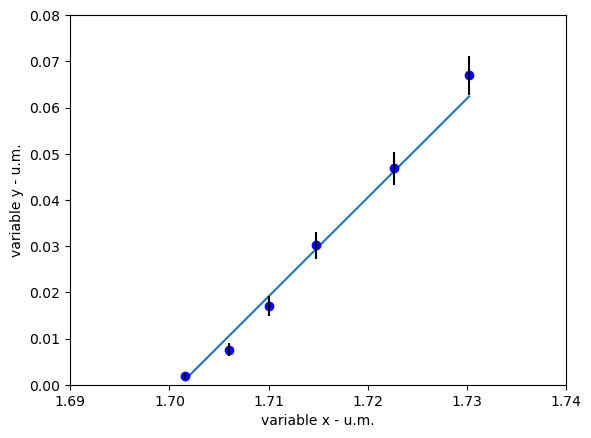

In [28]:
fig, ax = plt.subplots()
ax.set_ylim(0, 0.08)
ax.set_xlim(1.69, 1.74)
ax.set_xlabel('variable x - u.m.')
ax.set_ylabel('variable y - u.m.')
plt.plot(xdata,b*xdata+a,xdata,ydata,'bo')
plt.errorbar(xdata,ydata,yerr=yerr,ecolor='black', ls=" ")

Calcolo X^2 e errore standard della stima

In [26]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  7.282427210820121
 errore standard della stima (u.m.) =  0.0029971139679359333


In [6]:
coeff = 2.141875
elle = 72.2
t_zero = 4/coeff
g = (4*(3.14**2)*elle)/t_zero**2/10
print("g = ",g)

g =  81.64408871334456
